In [1]:
] activate ../../../DoubleDriveAutosome/Environment2/Environment

  Activating project at `~/Library/CloudStorage/OneDrive-ImperialCollegeLondon/PhD work/Drive_modelling/DoubleDriveAutosome/Environment2/Environment`


In [2]:
#Load evolutionary stability model
using NBInclude
@nbinclude("../../../DoubleDriveAutosome/Environment2/Environment/Setup.ipynb");
@nbinclude("./SimulationFunctions.ipynb");

In [3]:
using Distributions
using Random

## MDFS model

### Load in gamete and fitness tables

In [96]:
#Define all alleles and genotypes 
loci=["A"]
alleles = [["A1"],["A2"],["A3"],["A4"]];
genotypes = []
for i in 1:length(alleles)
    allele1 = alleles[i]
    for j in i:length(alleles)
        allele2 = alleles[j]
        push!(genotypes,([allele1 allele2]))
    end
end;
genotypes_m = genotypes
genotypes_f = genotypes;
falleles = alleles
malleles = alleles;

In [97]:
#Define symbols (don't change)
saf, haf, sαf, hαf, saαf,sam, ham, sαm, hαm, saαm, c, j, p, m, r = Sym("saf, haf, sαf, hαf, saαf,sam, ham, sαm, hαm, saαm, c, j, p, m, r")

genotypes_f_string = [string(genotypes_f[i][1]*genotypes_f[i][2]) for i in 1:length(genotypes_f)]
genotypes_m_string = [string(genotypes_m[i][1]*genotypes_m[i][2]) for i in 1:length(genotypes_m)]

#Read in gamete table
maternal_gt = readdlm("./MDFS/MDFS_MaternalGameteTable.csv", ',', String,header=true)[1]
maternal_gt = convert(Array{Any}, maternal_gt[:,2:end])
maternal_gt = eval.(Meta.parse.(maternal_gt))
maternal_gt = Sym.(maternal_gt)

paternal_gt = readdlm("./MDFS/MDFS_PaternalGameteTable.csv", ',', String,header=true)[1]
n_alleles = Int((length(paternal_gt[1,:])-1)/2)
paternal_gt = convert(Array{Any}, paternal_gt[:,2:end])
paternal_gt = eval.(Meta.parse.(paternal_gt))
paternal_gt = Sym.(paternal_gt)

#Read in fitness from storage
fitness_f = readdlm("./MDFS/MDFS_fitness_f.csv", ',', String,header=true)[1]
fitness_f = convert(Array{Any}, fitness_f[:,2])
fitness_f = eval.(Meta.parse.(fitness_f))
fitness_f = Sym.(fitness_f)

fitness_m = readdlm("./MDFS/MDFS_fitness_m.csv", ',', String,header=true)[1]
fitness_m = convert(Array{Any}, fitness_m[:,2])
fitness_m = eval.(Meta.parse.(fitness_m))
fitness_m = Sym.(fitness_m);


In [98]:
inputs = [genotypes_f,
    genotypes_m,
    maternal_gt,
    paternal_gt,
    fitness_f,
    fitness_m];

### Figure 1 (blue, red and green lines)

In [99]:
#Define simulation scenario
t=15
release_freq = 1.0

1.0

In [100]:
#SIT single release
release_genotype= ["A2" "A2"]

# Define inheritance and fitness params
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=1.0
pdict[ham]=1.0
pdict[sαm]=1.0
pdict[hαm]=1.0
pdict[saαm]=1.0

pdict[c]=0.0
pdict[j]=0.0
pdict[p]=0.0

subs_list = [(p,pdict[p]) for p in keys(pdict)];

#Simulate
output_vec = []
SIT_output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "b");

In [101]:
#fsRIDL single release
release_genotype= ["A1" "A2"]

# Define inheritance and fitness params
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=0.0
pdict[j]=0.0
pdict[p]=0.0

subs_list = [(p,pdict[p]) for p in keys(pdict)];

#Simulate
output_vec = []
fsRIDL_output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a");

In [102]:
#Homing single release
release_genotype= ["A1" "A2"]

# Define inheritance and fitness params
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=0.0
pdict[sαf]=1.0
pdict[hαf]=0.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=1.0
pdict[j]=0.0
pdict[p]=0.0

subs_list = [(p,pdict[p]) for p in keys(pdict)];

#Simulate
output_vec = []
homing_output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a");

In [103]:
#MDFS single release
release_genotype= ["A1" "A2"]

# Define inheritance and fitness params
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=1.0
pdict[j]=0.0
pdict[p]=0.0


subs_list = [(p,pdict[p]) for p in keys(pdict)];

#Simulate
output_vec = []
MDFS_output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a");

### Figure 5

#### MDFS Optimal

In [36]:
# Define inheritance and fitness params
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=1.0
pdict[j]=0.0
pdict[p]=0.0


subs_list = [(p,pdict[p]) for p in keys(pdict)];

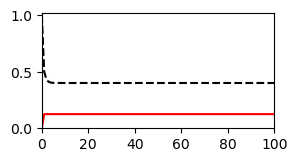

In [28]:
#Single release 100%
t=100
release_freq = 1
release_genotype= ["A1" "A2"]
#Simulate
output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a");

f1 = PyPlot.figure(figsize=(3,1.5))

PyPlot.plot(0:t,output["relative_number_females"].adult,color = "black","--",label="Relative no. biting females")  
PyPlot.plot(0:t,output["allelefreq_adult"].A2,color = "red","-",label="MDFS frequency")  
#PyPlot.plot(0:t,output["allelefreq_adult"].A3,color = "red","--",label="NHEJ product frequency")  

PyPlot.xlim(0,t)
PyPlot.ylim(0,1.02)

PyPlot.show()

In [29]:
#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
threshold = 0.01
rr = find_release_rate_required(n_releases,
                                0.0,
                                threshold,
                                pdict,
                                inputs,
                                t=n_releases,
                                release_genotype=["A1" "A2"])

0.041

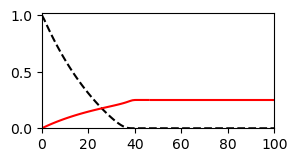

In [33]:
#Single release 100%
t=100
release_freq = rr
release_genotype= ["A1" "A2"]
#Simulate
output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a",
                                            release_regime = repeat([release_freq],t));

f1 = PyPlot.figure(figsize=(3,1.5))

PyPlot.plot(0:t,output["relative_number_females"].adult,color = "black","--",label="Relative no. biting females")  
PyPlot.plot(0:t,output["allelefreq_adult"].A2,color = "red","-",label="MDFS frequency")  

PyPlot.plot([47,t],[output["allelefreq_adult"].A2[47],output["allelefreq_adult"].A2[47]],color = "red","-")  

PyPlot.xlim(0,t)
PyPlot.ylim(0,1.02)

PyPlot.show()

#### MDFS Empirical

In [58]:
#homing rates
d_eq, e_eq, u_eq = symbols("d e u");

non_homed = 1-e_eq
WT = non_homed*(1-u_eq)
NHEJ = non_homed*u_eq;
c_eq = e_eq+NHEJ
j_eq = simplify(NHEJ/c_eq)

 u⋅(e - 1) 
───────────
e⋅u - e - u

In [63]:
u_ = 0.392 #Hammond et al 2020

d_ = 0.9955 #Data from Anna

e_ = (d_-0.5)*2

cleavage = subs(c_eq,(e_eq,e_),(u_eq,u_))
joining =subs(j_eq,(e_eq,e_),(u_eq,u_))

bias_m = 0.95

0.202

In [78]:
# Define inheritance and fitness params
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=0.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=cleavage
pdict[j]=joining
pdict[p]=1.0

subs_list = [(p,pdict[p]) for p in keys(pdict)];

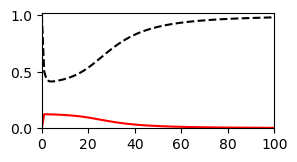

In [79]:
#Single release 100%
t=100
release_freq = 1
release_genotype= ["A1" "A2"]
#Simulate
output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a");

f1 = PyPlot.figure(figsize=(3,1.5))

PyPlot.plot(0:t,output["relative_number_females"].adult,color = "black","--",label="Relative no. biting females")  
PyPlot.plot(0:t,output["allelefreq_adult"].A2,color = "red","-",label="MDFS frequency")  
PyPlot.plot(0:t,output["allelefreq_adult"].A3,color = "red","--",label="NHEJ product frequency")  

PyPlot.xlim(0,t)
PyPlot.ylim(0,1.02)

PyPlot.show()

In [74]:
#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
threshold = 0.01
rr = find_release_rate_required(n_releases,
                                0.0,
                                threshold,
                                pdict,
                                inputs,
                                t=n_releases,
                                release_genotype=["A1" "A2"])

0.093

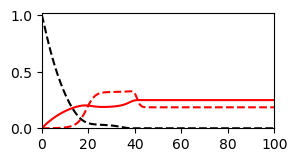

In [82]:
#Single release 100%
t=100
release_freq = rr
release_genotype= ["A1" "A2"]
#Simulate
output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a",
                                            release_regime = repeat([release_freq],t));

f1 = PyPlot.figure(figsize=(3,1.5))

PyPlot.plot(0:t,output["relative_number_females"].adult,color = "black","--",label="Relative no. biting females")  
PyPlot.plot(0:t,output["allelefreq_adult"].A2,color = "red","-",label="MDFS frequency")  
PyPlot.plot(0:t,output["allelefreq_adult"].A4,color = "red","--",label="NHEJ")  

PyPlot.xlim(0,t)
PyPlot.ylim(0,1.02)

PyPlot.show()

### Table

In [86]:
# SIT
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=1.0
pdict[ham]=1.0
pdict[sαm]=1.0
pdict[hαm]=1.0
pdict[saαm]=1.0

pdict[c]=0
pdict[j]=0
pdict[p]=0

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
for threshold in [0.05,0.01]
    println(find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=["A2" "A2"],
                                    fitness = "b"))
end


1.2969999999999995
1.2999999999999992


In [87]:
# RIDL
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=1.0
pdict[ham]=1.0
pdict[sαm]=1.0
pdict[hαm]=1.0
pdict[saαm]=1.0

pdict[c]=0
pdict[j]=0
pdict[p]=0

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
for threshold in [0.05,0.01]
    println(find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=["A2" "A2"],
                                    fitness = "a"))
end


0.43800000000000006
0.44000000000000006


In [88]:
# fsRIDL
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=0
pdict[j]=0
pdict[p]=0

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
for threshold in [0.05,0.01]
    println(find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=["A2" "A2"],
                                    fitness = "a"))
end


0.668
0.678


In [84]:
# MDFS
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=1.0
pdict[j]=0.0
pdict[p]=0.0

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
for threshold in [0.05,0.01]
    println(find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=["A1" "A2"]))
end


0.037000000000000005
0.041


In [85]:
# MDFS empirical
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=0.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=cleavage
pdict[j]=joining
pdict[p]=1.0

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
for threshold in [0.05,0.01]
    println(find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=["A1" "A2"]))
end


0.08900000000000001
0.093


## MDFS with XS model

### Load in gamete and fitness tables

In [80]:
#Define all alleles and genotypes 
loci = ["A","B"]

alleles = [["A1", "B1"],
            ["A1", "B2"],
            ["A2", "B1"],
            ["A2", "B2"],
            ["A3", "B1"],
            ["A3", "B2"],
            ["A4", "B1"],
            ["A4", "B2"]]

genotypes = []
for i in 1:length(alleles)
    allele1 = alleles[i]
    for j in i:length(alleles)
        allele2 = alleles[j]
        push!(genotypes,([allele1 allele2]))
    end
end;
genotypes_m = genotypes
genotypes_f = genotypes;
falleles = alleles
malleles = alleles;

In [81]:
#Define symbols (don't change)
saf, haf, sαf, hαf, saαf,sam, ham, sαm, hαm, saαm, c, j, p, m, r = Sym("saf, haf, sαf, hαf, saαf,sam, ham, sαm, hαm, saαm, c, j, p, m, r")

genotypes_f_string = [string(genotypes_f[i][1]*genotypes_f[i][2]) for i in 1:length(genotypes_f)]
genotypes_m_string = [string(genotypes_m[i][1]*genotypes_m[i][2]) for i in 1:length(genotypes_m)]

#Read in gamete table
maternal_gt = readdlm("./MDFS_XS/MDFS_XS_MaternalGameteTable.csv", ',', String,header=true)[1]
maternal_gt = convert(Array{Any}, maternal_gt[:,2:end])
maternal_gt = eval.(Meta.parse.(maternal_gt))
maternal_gt = Sym.(maternal_gt)

paternal_gt = readdlm("./MDFS_XS/MDFS_XS_PaternalGameteTable.csv", ',', String,header=true)[1]
n_alleles = Int((length(paternal_gt[1,:])-1)/2)
paternal_gt = convert(Array{Any}, paternal_gt[:,2:end])
paternal_gt = eval.(Meta.parse.(paternal_gt))
paternal_gt = Sym.(paternal_gt)

#Read in fitness from storage
fitness_f = readdlm("./MDFS_XS/MDFS_XS_fitness_f.csv", ',', String,header=true)[1]
fitness_f = convert(Array{Any}, fitness_f[:,2])
fitness_f = eval.(Meta.parse.(fitness_f))
fitness_f = Sym.(fitness_f)

fitness_m = readdlm("./MDFS_XS/MDFS_XS_fitness_m.csv", ',', String,header=true)[1]
fitness_m = convert(Array{Any}, fitness_m[:,2])
fitness_m = eval.(Meta.parse.(fitness_m))
fitness_m = Sym.(fitness_m);


In [82]:
inputs = [genotypes_f,
    genotypes_m,
    maternal_gt,
    paternal_gt,
    fitness_f,
    fitness_m];

### Figure 1 (orange line)

In [108]:
#MDFS with XS single release
release_genotype= ["A1" "A2"; "B1" "B2"]
release_freq = 1.0

# Define inheritance and fitness params
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=1.0
pdict[j]=0.0
pdict[p]=0.0
pdict[m]=1.0

pdict[r]=0.5

subs_list = [(p,pdict[p]) for p in keys(pdict)];

#Simulate
output_vec = []
MDFSXS_output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a");

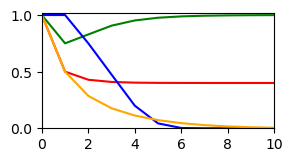

In [114]:
#no. females
f1 = PyPlot.figure(figsize=(3,1.5))

PyPlot.plot(0:t,MDFS_output["relative_number_females"].adult,color = "red","-",label="MDFS frequency")  
PyPlot.plot(0:t,fsRIDL_output["relative_number_females"].adult,color = "green","-",label="MDFS frequency")
PyPlot.plot(0:t,homing_output["relative_number_females"].adult,color = "blue","-",label="MDFS frequency")
PyPlot.plot(0:t,MDFSXS_output["relative_number_females"].adult,color = "orange","-",label="MDFS frequency")

PyPlot.xlim(0,10)
PyPlot.ylim(0,1.02)
#PyPlot.legend(bbox_to_anchor=(1, 1))
#PyPlot.ylim(0.01,0.3)

#PyPlot.savefig("./figures/TimeSeries_OPtimalMDFS_single1.pdf",bbox_inches = "tight")

PyPlot.show()

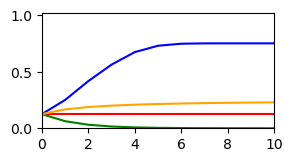

In [115]:
#allele frequency 
f1 = PyPlot.figure(figsize=(3,1.5))

PyPlot.plot(0:t,MDFS_output["allelefreq_reproadult"].A2,color = "red","-",label="MDFS frequency")  
PyPlot.plot(0:t,fsRIDL_output["allelefreq_reproadult"].A2,color = "green","-",label="MDFS frequency")
PyPlot.plot(0:t,homing_output["allelefreq_reproadult"].A2,color = "blue","-",label="MDFS frequency")
PyPlot.plot(0:t,MDFSXS_output["allelefreq_reproadult"].A2,color = "orange","-",label="MDFS frequency")

PyPlot.xlim(0,10)
PyPlot.ylim(0,1.02)
#PyPlot.legend(bbox_to_anchor=(1, 1))
#PyPlot.ylim(0.01,0.3)

#PyPlot.savefig("./figures/TimeSeries_OPtimalMDFS_single1.pdf",bbox_inches = "tight")

PyPlot.show()

### Figure 5

#### MDFS with XS Optimal

In [121]:
# Define inheritance and fitness params
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=1.0
pdict[j]=0.0
pdict[p]=0.0

pdict[m]=1.0
pdict[r]=0.5

subs_list = [(p,pdict[p]) for p in keys(pdict)];

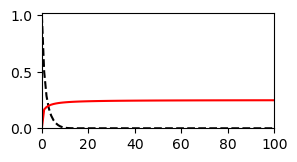

In [122]:
#Single release 100%
t=100
release_freq = 1
release_genotype= ["A1" "A2"; "B1" "B2"]
#Simulate
output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a");

f1 = PyPlot.figure(figsize=(3,1.5))

PyPlot.plot(0:t,output["relative_number_females"].adult,color = "black","--",label="Relative no. biting females")  
PyPlot.plot(0:t,output["allelefreq_adult"].A2,color = "red","-",label="MDFS frequency")  
#PyPlot.plot(0:t,output["allelefreq_adult"].A3,color = "red","--",label="NHEJ product frequency")  

PyPlot.xlim(0,t)
PyPlot.ylim(0,1.02)

PyPlot.show()

In [123]:
#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
threshold = 0.01
rr = find_release_rate_required(n_releases,
                                0.0,
                                threshold,
                                pdict,
                                inputs,
                                t=n_releases,
                                release_genotype=["A1" "A2"; "B1" "B2"])

0.005

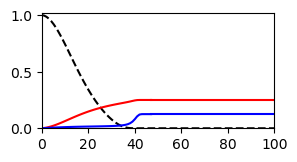

In [126]:
#Single release 100%
t=100
release_freq = rr
release_genotype= ["A1" "A2"; "B1" "B2"]
#Simulate
output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a",
                                            release_regime = repeat([release_freq],t));

f1 = PyPlot.figure(figsize=(3,1.5))

PyPlot.plot(0:t,output["relative_number_females"].adult,color = "black","--",label="Relative no. biting females")  
PyPlot.plot(0:t,output["allelefreq_adult"].A2,color = "red","-",label="MDFS frequency")  
PyPlot.plot(0:t,output["allelefreq_adult"].B2,color = "blue","-",label="Booster")  

PyPlot.plot([47,t],[output["allelefreq_adult"].A2[47],output["allelefreq_adult"].A2[47]],color = "red","-")  
PyPlot.plot([47,t],[output["allelefreq_adult"].B2[47],output["allelefreq_adult"].B2[47]],color = "blue","-")  

PyPlot.xlim(0,t)
PyPlot.ylim(0,1.02)

PyPlot.show()

#### MDFS with XS Empirical

In [83]:
#homing rates
d_eq, e_eq, u_eq = symbols("d e u");

non_homed = 1-e_eq
WT = non_homed*(1-u_eq)
NHEJ = non_homed*u_eq;
c_eq = e_eq+NHEJ
j_eq = simplify(NHEJ/c_eq)

 u⋅(e - 1) 
───────────
e⋅u - e - u

In [84]:
u_ = 0.392 #Hammond et al 2020

d_ = 0.9955 #Data from Anna

e_ = (d_-0.5)*2

cleavage = subs(c_eq,(e_eq,e_),(u_eq,u_))
joining =subs(j_eq,(e_eq,e_),(u_eq,u_))

bias_m = 0.95
recomb = 0.1


0.202

In [85]:
# Define inheritance and fitness params
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=0.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=cleavage
pdict[j]=joining
pdict[p]=1.0

pdict[m]=bias_m 
pdict[r]=recomb

subs_list = [(p,pdict[p]) for p in keys(pdict)];

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


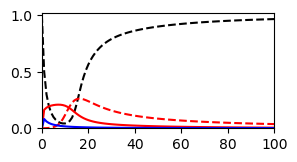

In [86]:
#Single release 100%
t=100
release_freq = 1
release_genotype= ["A1" "A2"; "B1" "B2"]
#Simulate
output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a");

f1 = PyPlot.figure(figsize=(3,1.5))

PyPlot.plot(0:t,output["relative_number_females"].adult,color = "black","--",label="Relative no. biting females")  
PyPlot.plot(0:t,output["allelefreq_adult"].A2,color = "red","-",label="MDFS frequency")  
PyPlot.plot(0:t,output["allelefreq_adult"].A4,color = "red","--",label="NHEJ product frequency")  
PyPlot.plot(0:t,output["allelefreq_adult"].B2,color = "blue","-",label="NHEJ product frequency")  

PyPlot.xlim(0,t)
PyPlot.ylim(0,1.02)

PyPlot.show()

In [183]:
#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
threshold = 0.01
rr = find_release_rate_required(n_releases,
                                0.0,
                                threshold,
                                pdict,
                                inputs,
                                t=n_releases,
                                release_genotype=["A1" "A2"; "B2" "B1"],
                                accuracy = 0.001)

0.035

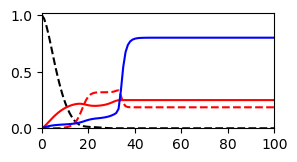

In [184]:
#Single release 100%
t=100
release_freq = rr
release_genotype= ["A1" "A2"; "B2" "B1"]
#Simulate
output = Simulate_single_release_example(subs_list,
                                            inputs,
                                            t,
                                            release_freq,
                                            release_genotype,
                                            fitness = "a",
                                            release_regime = repeat([release_freq],t));

f1 = PyPlot.figure(figsize=(3,1.5))

PyPlot.plot(0:t,output["relative_number_females"].adult,color = "black","--",label="Relative no. biting females")  
PyPlot.plot(0:t,output["allelefreq_adult"].A2,color = "red","-",label="MDFS frequency")  
PyPlot.plot(0:t,output["allelefreq_adult"].A4,color = "red","--",label="NHEJ")  
PyPlot.plot(0:t,output["allelefreq_adult"].B2,color = "blue","-",label="Booster")  

PyPlot.xlim(0,t)
PyPlot.ylim(0,1.02)

PyPlot.show()

### Table

In [187]:
# MDFS with XS
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=1.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=1.0
pdict[j]=0.0
pdict[p]=0.0

pdict[m]=1.0
pdict[r]=0.5

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
for threshold in [0.05,0.01]
    println(find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=["A1" "A2"; "B2" "B1"]))
end

0.004
0.005


In [87]:
# MDFS with XS empirical
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=0.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=cleavage
pdict[j]=joining
pdict[p]=1.0

pdict[m]=bias_m 
pdict[r]=recomb

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
for threshold in [0.05,0.01]
    println(find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=["A1" "A2"; "B2" "B1"]))
end


0.025
0.035


### Sensitivitiy analysis

In [ ]:
#setup 
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=0.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=cleavage
pdict[j]=joining
pdict[p]=1.0

pdict[m]=bias_m 

In [193]:
#Unlinked hets
pdict[r]=0.5
release_genotype = ["A1" "A2"; "B2" "B1"]

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
threshold = 0.01
rr_output = []
param_vals = collect(0:0.01:1)
param_label=[p]
for param in param_vals
    rr = find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=release_genotype,
                                    param_mod=[param],
                                    param_label=param_label)
    push!(rr_output,rr)
end
rr_output_het_unlinked = rr_output
@save "./results/SensitivityAnalysis_p_MDFS+XS_unlinkedhets.jld2" rr_output


In [194]:
#linked hets
pdict[r]=0.01
release_genotype = ["A1" "A2"; "B2" "B1"]

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
threshold = 0.01
rr_output = []
param_vals = collect(0:0.01:1)
param_label=[p]
for param in param_vals
    rr = find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=release_genotype,
                                    param_mod=[param],
                                    param_label=param_label)
    push!(rr_output,rr)
end
rr_output_het_linked = rr_output
@save "./results/SensitivityAnalysis_p_MDFS+XS_linkedhets.jld2" rr_output


In [195]:
#unlinked homs
pdict[r]=0.5
release_genotype = ["A1" "A2"; "B2" "B2"]

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
threshold = 0.01
rr_output = []
param_vals = collect(0:0.01:1)
param_label=[p]
for param in param_vals
    rr = find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=release_genotype,
                                    param_mod=[param],
                                    param_label=param_label)
    push!(rr_output,rr)
end
rr_output_hom_unlinked = rr_output
@save "./results/SensitivityAnalysis_p_MDFS+XS_unlinkedhoms.jld2" rr_output


In [196]:
#linked homs
pdict[r]=0.01
release_genotype = ["A1" "A2"; "B2" "B2"]

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
threshold = 0.01
rr_output = []
param_vals = collect(0:0.01:1)
param_label=[p]
for param in param_vals
    rr = find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=release_genotype,
                                    param_mod=[param],
                                    param_label=param_label)
    push!(rr_output,rr)
end
rr_output_hom_linked = rr_output
@save "./results/SensitivityAnalysis_p_MDFS+XS_linkedhoms.jld2" rr_output


In [197]:
#MDFS alone
pdict[r]=0.5
release_genotype = ["A1" "A2"; "B1" "B1"]

#Find repeat release rate for 99% suppression within 36 generations
n_releases = 36
threshold = 0.01
rr_output = []
param_vals = collect(0:0.01:1)
param_label=[p]
for param in param_vals
    rr = find_release_rate_required(n_releases,
                                    0.0,
                                    threshold,
                                    pdict,
                                    inputs,
                                    t=n_releases,
                                    release_genotype=release_genotype,
                                    param_mod=[param],
                                    param_label=param_label)
    push!(rr_output,rr)
end
rr_output_hom_linked = rr_output
@save "./results/SensitivityAnalysis_p_MDFS.jld2" rr_output


sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


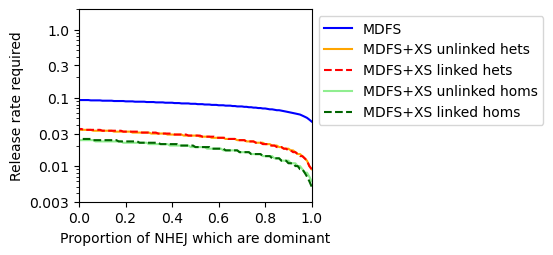

In [201]:
#plot
param_vals = reverse(collect(0:0.01:1))

f1 = PyPlot.figure(figsize=(3,2.5))

@load "./results/SensitivityAnalysis_p_MDFS.jld2"
PyPlot.plot(param_vals,rr_output,label ="MDFS",color="blue")
#PyPlot.plot(0.0,lab_rrr[index],"o")

@load "./results/SensitivityAnalysis_p_MDFS+XS_unlinkedhets.jld2"
PyPlot.plot(param_vals,rr_output,label ="MDFS+XS unlinked hets",color="orange")
#PyPlot.plot(0.0,lab_rrr[index],"o")

@load "./results/SensitivityAnalysis_p_MDFS+XS_linkedhets.jld2"
PyPlot.plot(param_vals,rr_output,label ="MDFS+XS linked hets",color="red","--")
#PyPlot.plot(0.0,lab_rrr[index],"o")

@load "./results/SensitivityAnalysis_p_MDFS+XS_unlinkedhoms.jld2"
PyPlot.plot(param_vals,rr_output,label ="MDFS+XS unlinked homs",color="lightgreen")
#PyPlot.plot(0.0,lab_rrr[index],"o")

@load "./results/SensitivityAnalysis_p_MDFS+XS_linkedhoms.jld2"
PyPlot.plot(param_vals,rr_output,label ="MDFS+XS linked homs",color="darkgreen","--")

PyPlot.xlim(0,1)
PyPlot.yscale("log")
PyPlot.ylim(0.018,2)
PyPlot.yticks([0.003,0.01,0.03,0.1,0.3,1],[0.003,0.01,0.03,0.1,0.3,1])

PyPlot.ylabel("Release rate required")
PyPlot.xlabel("Proportion of NHEJ which are dominant")

PyPlot.legend(bbox_to_anchor=(1, 1))

PyPlot.show()

## Cage trial simulation

### Load in gamete and fitness tables

In [4]:
#Define all alleles and genotypes 
loci=["A"]
alleles = [["A1"],["A2"],["A3"],["A4"]];
genotypes = []
for i in 1:length(alleles)
    allele1 = alleles[i]
    for j in i:length(alleles)
        allele2 = alleles[j]
        push!(genotypes,([allele1 allele2]))
    end
end;
genotypes_m = genotypes
genotypes_f = genotypes;
falleles = alleles
malleles = alleles;

In [5]:
#Define symbols (don't change)
saf, haf, sαf, hαf, saαf,sam, ham, sαm, hαm, saαm, c, j, p, m, r = Sym("saf, haf, sαf, hαf, saαf,sam, ham, sαm, hαm, saαm, c, j, p, m, r")

genotypes_f_string = [string(genotypes_f[i][1]*genotypes_f[i][2]) for i in 1:length(genotypes_f)]
genotypes_m_string = [string(genotypes_m[i][1]*genotypes_m[i][2]) for i in 1:length(genotypes_m)]

#Read in gamete table
maternal_gt = readdlm("./MDFS/MDFS_MaternalGameteTable.csv", ',', String,header=true)[1]
maternal_gt = convert(Array{Any}, maternal_gt[:,2:end])
maternal_gt = eval.(Meta.parse.(maternal_gt))
maternal_gt = Sym.(maternal_gt)

paternal_gt = readdlm("./MDFS/MDFS_PaternalGameteTable.csv", ',', String,header=true)[1]
n_alleles = Int((length(paternal_gt[1,:])-1)/2)
paternal_gt = convert(Array{Any}, paternal_gt[:,2:end])
paternal_gt = eval.(Meta.parse.(paternal_gt))
paternal_gt = Sym.(paternal_gt)

#Read in fitness from storage
fitness_f = readdlm("./MDFS/MDFS_fitness_f.csv", ',', String,header=true)[1]
fitness_f = convert(Array{Any}, fitness_f[:,2])
fitness_f = eval.(Meta.parse.(fitness_f))
fitness_f = Sym.(fitness_f)

fitness_m = readdlm("./MDFS/MDFS_fitness_m.csv", ',', String,header=true)[1]
fitness_m = convert(Array{Any}, fitness_m[:,2])
fitness_m = eval.(Meta.parse.(fitness_m))
fitness_m = Sym.(fitness_m);


In [6]:
#For simplicity we assume only recessive NHEJ products, therefore remove the dominant allele to reduce no. genotypes
genotypes_mask = ["A3" in g for g in genotypes_f].==0
alleles_mask = ["A3" in g for g in falleles].==0

genotypes_f = genotypes_f[genotypes_mask]
genotypes_m = genotypes_m[genotypes_mask]
maternal_gt = maternal_gt[genotypes_mask,alleles_mask]
paternal_gt = paternal_gt[genotypes_mask,vcat(alleles_mask,alleles_mask)]
fitness_f = fitness_f[genotypes_mask]
fitness_m = fitness_m[genotypes_mask]
falleles = falleles[alleles_mask]
malleles = malleles[alleles_mask]

inputs = [genotypes_f,
    genotypes_m,
    maternal_gt,
    paternal_gt,
    fitness_f,
    fitness_m];

### Simulate cage trial

#### Set up

In [15]:
d_eq, e_eq, u_eq = symbols("d e u");

non_homed = 1-e_eq
WT = non_homed*(1-u_eq)
NHEJ = non_homed*u_eq;
c_eq = e_eq+NHEJ
j_eq = simplify(NHEJ/c_eq)

u_ = 0.392 #Hammond et al 2020
d_ = 0.9955 #Data from Anna
e_ = (d_-0.5)*2

cleavage = subs(c_eq,(e_eq,e_),(u_eq,u_))
joining =subs(j_eq,(e_eq,e_),(u_eq,u_))


0.00354741143537433

In [16]:
# Define inheritance and fitness params
pdict = Dict()
pdict[saf]=1.0
pdict[haf]=1.0
pdict[sαf]=1.0
pdict[hαf]=0.0
pdict[saαf]=1.0
pdict[sam]=0.0
pdict[ham]=0.0
pdict[sαm]=0.0
pdict[hαm]=0.0
pdict[saαm]=0.0

pdict[c]=cleavage
pdict[j]=joining
pdict[p]=1.0

subs_list = [(p,pdict[p]) for p in keys(pdict)];

In [17]:
#Fitness
fitness_f_vals = Array{Float64}(fitness_f.subs(subs_list))
fitness_m_vals = Array{Float64}(fitness_m.subs(subs_list))

maternal_gt_vals = Array{Float64}(maternal_gt.subs(subs_list))
paternal_gt_vals = Array{Float64}(paternal_gt.subs(subs_list))

ic_f_vals,ic_m_vals  = make_ics(maternal_gt_vals,paternal_gt_vals);


In [18]:
egg_count_csv = CSV.File("./egg counts.csv")
egg_count_df = DataFrame(egg_count_csv)
Egg_array = vcat(collect(skipmissing(egg_count_df[!,"WT"])),
    collect(skipmissing(egg_count_df[!,"MDFS"])),
    collect(skipmissing(egg_count_df[!,"MDFS + X-shr"])),
    collect(skipmissing(egg_count_df[!,"WT_1"])),
    collect(skipmissing(egg_count_df[!,"WT_2"])),
    collect(skipmissing(egg_count_df[!,"WT_3"]))
    );

In [19]:
#Calculate the Rm of the population
average_eggs = sum(Egg_array)/length(Egg_array)
hatching =  0.862
pupae_surv_female = 0.9915*(1-0.063)
mating_probability = 0.933

(average_eggs*hatching*pupae_surv_female*mating_probability)/2

34.60752462209466

In [20]:
#Reducing the reproductive output to 1/4 mimics a population growth rate of ~9 
34.60752462209466/4

8.651881155523665

In [21]:
function run_sim(Egg_array,fitness_f,ic; n_released_males = 100, n_releases = 5, first_release = 4, gen = 20,s=1)
    
    #____________________________________________________________
    #Parameters from observed rates
    
    #Egg_Array loaded in from csv above - includes results of females who mate and lay 0 eggs. 
    
    #Probablilty of each female mating, males are assumed to all be available
    mating_probability = 0.933 #data from phenotype assay
    
    #Hatching probability
    hatching = 0.862 #phenotype assays
    
    #Probability of larvae pupating
    larvae_surv = 0.96 #lab assays
    
    #Probability of pupae emerging and surviving to mating
    pupae_emergence = 0.9915
    surv_to_feed = 1-0.063
    surv_male_drowning = 1-0.0644
    pupae_surv_female = pupae_emergence*surv_to_feed*mating_probability
    pupae_surv_male = pupae_emergence*surv_to_feed*surv_male_drowning
    #____________________________________________________________
    #Storage for time series output
    total_egg_count = [NaN]
    total_MDFS_freq = [0.0]
    n_WT_females = [200]

    #____________________________________________________________
    #Starting population
    #Genotype categories = WT/WT, WT/MDFS, WT/R, MDFS/MDFS, MDFS/R, R/R
    n_male_pupae = [200,0,0,0,0,0];
    n_female_pupae = [200,0,0,0,0,0];

    #3 WT generations before the first release
    for t in 1:gen
        
        #____________________________________________________________
        # Generate the number of females of each genotype which mate 
        ## This is a combination of
            ## the number of female pupae in the cage
            ## the probability of each pupae surviving to adulthood: currently equal for all genotypes
            ## the probability of each female mating: currently equal for all genotypes
        n_mating_female = [0,0,0,0,0,0]
        #Draw number of mating females from n_pupae of each genotypes from a binomial distribution
            ## This is done separately for the group of females of each genotype
        for g in 1:6  
            dist = Binomial(n_female_pupae[g],pupae_surv_female)
            n_mating_female[g] = rand(dist)
        end
        #Apply fitness effects to females: 
            ## All MDFS females die
            ## All those carrying two disrupted loci die (MDFS or non-functional mutant)
        ## Since the empirical data shows 100% KO, we apply fitness costs without drawing any random numbers
        n_mating_female = Int64.(n_mating_female .* fitness_f[:])

        #____________________________________________________________
        # Generate the number of males of each genotype which enter the mating pool
        
        #Release MDFS male heterozygotes into the cage given a certain release regime        
        if ((t >= first_release) & (t < first_release+n_releases))
            n_male_pupae[2] = n_male_pupae[2] + n_released_males
        end
        
        #Generate the number of males of each genotype which enter the mating pool
        ## This is a combination of
            ## the number of male pupae in the cage
            ## the probability of each male pupae surviving to adulthood: currently equal for all genotypes
        ## We assume all males can mate with any female, and males can mate mutliple times: 
            ##there is no reduced mating success by genotype
        n_mating_male = [0,0,0,0,0,0]
        
        #Draw number of surviving males from n_pupae of each genotypes from a binomial distribution
            ## This is done separately for the group of males of each genotype
        for g in 1:6  
            dist = Binomial(n_male_pupae[g],pupae_surv_male)
            n_mating_male[g] = rand(dist)
        end
        #No genotype specific fitness effects are applied to males

        #____________________________________________________________
        #Check whether there are both adult males and females in the population
            ## Otherwise end the simulation
        if (sum(n_mating_male) .== 0) | (sum(n_mating_female) .== 0)
            #CENSUS? 
            push!(total_egg_count,0)
            push!(total_MDFS_freq,NaN)
            push!(n_WT_females,0)
            return(total_egg_count,total_MDFS_freq,n_WT_females)
        end
               
        #____________________________________________________________
        #Produce eggs
        n_eggs_store = [0,0,0,0,0,0]
        #Create the mating pairs
        ## For each female genotype, draw the male partners from a multinomial distribution parameterised by
            ## the number of females of the genotype in the cage
            ## the frequency of males of each genotype in the cage
        for n_females_genotype in 1:6 
            dist = Multinomial(n_mating_female[n_females_genotype], n_mating_male./sum(n_mating_male))
            mating_pairs = rand(dist)
            #Create the eggs produced by each mating pair:
            #The total number of eggs for each mating pair is drawn from an array of observed egg numnbers
            #The genotype of each egg is drawn from a multinomial distribution parameterised by 
                #the number of eggs 
                #the probability of producing each type of offsping for the parental cross
            for n_males_genotype in 1:6
                for i in 1:mating_pairs[n_males_genotype]
                    dist = Multinomial(rand(Egg_array), ic[n_females_genotype,n_males_genotype,:]) #LINE OF THE INHERITANCE CUBE
                    #Track the total number of eggs produced per cage
                    n_eggs_store = n_eggs_store .+ rand(dist)
                end
            end
        end
        #Eggs are assigned a sex at random
            ## For each genotype, draw a random number of offspring to be classed as females 
            ## The remaning are classified as male
        n_sexed_eggs_store = Array{Int64}(undef,(6,2))
        for g in 1:6  
            dist = Binomial(n_eggs_store[g],0.5)
            n_sexed_eggs_store[g,1] = rand(dist)
            n_sexed_eggs_store[g,2] = n_eggs_store[g]-n_sexed_eggs_store[g,1]
        end
        
        #CENSUS the number of eggs
        #Census the total number of eggs from a single round of laying
        push!(total_egg_count,sum(n_eggs_store))
        
        
        #____________________________________________________________
        #Let all eggs hatch into larvae
        n_sexed_larvae_store = Array{Int64}(undef,(6,2))
        #Draw number of larvae from n_eggs of each genotypes and sex from a binomial distribution
            ## This is done separately for the group of males and females of each genotype
        for g in 1:6  
            dist = Binomial(n_sexed_eggs_store[g,1],hatching)
            n_sexed_larvae_store[g,1] = rand(dist)
            
            dist = Binomial(n_sexed_eggs_store[g,2],hatching)
            n_sexed_larvae_store[g,2] = rand(dist)
        end
                
        #____________________________________________________________
        #Measure the frequency of larvae carrying the MDFS construct
            ##Take 5 trays of 150 and screen the larvae for frequency of the allele 
            ##Two or 3 trays of 150 larvae are kept for backup
            ##Randomly downsample 150*5 individuals for measuring of the MDFS carrier
        
        dist = vcat(fill.([1,2,3,4,5,6,7,8,9,10,11,12], vcat(n_sexed_larvae_store[:,1],n_sexed_larvae_store[:,2]))...)

        if sum(vcat(n_sexed_larvae_store[:,1],n_sexed_larvae_store[:,2])) > (150*5)
            sampled_larvae = sample(dist,Int64((150*5)),replace=false);
            n_larvae = [count(==(i), sampled_larvae) for i in [1,2,3,4,5,6,7,8,9,10,11,12]]
        else
            n_larvae = vcat(n_sexed_larvae_store[:,1],n_sexed_larvae_store[:,2])
        end
        push!(total_MDFS_freq,(n_larvae[2]+
                                n_larvae[4]+
                                n_larvae[5]+
                                n_larvae[2+6]+
                                n_larvae[4+6]+
                                n_larvae[5+6])/sum(n_larvae))
        
        #____________________________________________________________
        #Apply artificial mortality
        #Randomly select 1/s of the larvae to continue to the next generation... 
        #Assume exactly 1/4 of the larvae are selected and allowed to pupate, 
        ### Produce a vector containing numbers 1:6 representing the 12 genotypes of both sexes, 
            ## each repeated the number of times they are present in the larvae population. 
            ## This is to allow down sampling by randomly selecting X individuals from the egg pool without replacement.

        dist = vcat(fill.([1,2,3,4,5,6,7,8,9,10,11,12], vcat(n_sexed_larvae_store[:,1],n_sexed_larvae_store[:,2]))...)
        
        total_n_larvae = sum(vcat(n_sexed_larvae_store[:,1],n_sexed_larvae_store[:,2]))
        sampled_larvae = sample(dist,Int64(round(total_n_larvae/s)),replace=false);
        n_larvae = [count(==(i), sampled_larvae) for i in [1,2,3,4,5,6,7,8,9,10,11,12]]
        n_sexed_larvae_store = Array{Int64}(undef,(6,2))
        n_sexed_larvae_store[:,1] = n_larvae[1:6]
        n_sexed_larvae_store[:,2] = n_larvae[7:end]
        
        #____________________________________________________________
        #Let larvae pupate
        n_sexed_pupae_store = Array{Int64}(undef,(6,2))
        #Draw number of larvae from n_eggs of each genotypes and sex from a binomial distribution
            ## This is done separately for the group of males and females of each genotype
        for g in 1:6  
            dist = Binomial(n_sexed_larvae_store[g,1],larvae_surv)
            n_sexed_pupae_store[g,1] = rand(dist)
            
            dist = Binomial(n_sexed_larvae_store[g,2],larvae_surv)
            n_sexed_pupae_store[g,2] = rand(dist)
        end
        
        #____________________________________________________________
        #Produce new generation by randomly selecting 400 pupae to seed the next cage
            ## Produce a vector containing numbers 1:6 representing the 12 genotypes of both sexes, 
            ## each repeated the number of times they are present in the pupae population. 
            ## This is to allow down sampling by randomly selecting X individuals from the egg pool without replacement.
        dist = vcat(fill.([1,2,3,4,5,6,7,8,9,10,11,12], vcat(n_sexed_pupae_store[:,1],n_sexed_pupae_store[:,2]))...)

        total_n_pupae = sum(vcat(n_sexed_pupae_store[:,1],n_sexed_pupae_store[:,2]))
        if total_n_pupae > 400
            sampled_pupae = sample(dist,Int64(400),replace=false);
            n_pupae = [count(==(i), sampled_pupae) for i in [1,2,3,4,5,6,7,8,9,10,11,12]]
        else
            n_pupae = vcat(n_sexed_pupae_store[:,1],n_sexed_pupae_store[:,2])
        end

        n_female_pupae = n_pupae[1:6]
        n_male_pupae = n_pupae[7:12]
        
        #When the pupae are selected they are sexed and the number of WT female pupae entering the next population are counted
        push!(n_WT_females,(n_female_pupae[1]+n_female_pupae[3]))
        
        
    end
    
    return(total_egg_count,total_MDFS_freq,n_WT_females)
end

run_sim (generic function with 1 method)

#### Calculating expectations

In [73]:
#Testing for elimination probability
Random.seed!(123)
n=0
elim = []
for i in 1:1000000
    run = run_sim(Egg_array,fitness_f_vals,ic_f_vals.+ic_m_vals,n_releases = 50, first_release = 4, gen = 50,s=4)
    #Save the number of generations with population size >0 (i.e. survival time)
    push!(elim,length(run[3][run[3].>0]))
end
#Remove the first 3 since these were "non-release" generations
elim = elim.-3;

In [74]:
#Mean no. generations populations persist
mean(elim)

9.219171

In [75]:
std(elim)

5.831051798254245

In [76]:
quantile(elim,0.025)

5.0

In [77]:
quantile(elim,0.975)

25.0

In [98]:
#Testing for survival probability after 3 releases for 10 generations
Random.seed!(123)
n=0
elim = []
nsims = 1000000
for i in 1:nsims
    run = run_sim(Egg_array,fitness_f_vals,ic_f_vals.+ic_m_vals,n_released_males = 100,n_releases = 3, first_release = 4, gen = 15 ,s=4)
    push!(elim,run[3][end]==0)
end


In [99]:
1-(sum(elim)/nsims)

0.832098

In [ ]:
#Testing for survival probability after 4 releases for 10 generations
Random.seed!(123)
n=0
elim = []
nsims = 1000000
for i in 1:nsims
    run = run_sim(Egg_array,fitness_f_vals,ic_f_vals.+ic_m_vals,n_released_males = 100,n_releases = 4, first_release = 4, gen = 16 ,s=4)
    push!(elim,run[3][end]==0)
end
1-(sum(elim)/nsims)

#### Figure 4

In [22]:
Release1 = [200,202,215,187,127,81,43,55,24,16,10,0]
Release2 = [200,186,198,189,143,128,72,45,38,31,18,0]
Stop1 = [200,202,215,187,127,81,49,87,58,78,66,60,61]
Stop2 = [200,186,198,189,143,128,70,62,52,66,45,79,107]

Release1_CFP = [0,0,0,0,0.233,0.584,0.699,0.683,0.845,0.789,0.904,1.0]
Release2_CFP = [0,0,0,0,0.233,0.391,0.64,0.793,0.808,0.707,0.895,1.0]
Stop1_CFP = [0,0,0,0,0.233,0.584,0.699,0.595,0.621,0.597,0.688,0.720,0.775,0.823]
Stop2_CFP = [0,0,0,0,0.233,0.391,0.64,0.637,0.66,0.652,0.697,0.375,0.413,0.381];

0.152


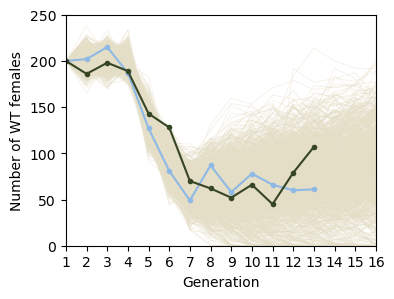

In [294]:
#No. WT females
Random.seed!(123)
f1 = PyPlot.figure(figsize=(4,3),frameon=false)
dist = []
#drive construct
n=0
for i in 1:1000
    run = run_sim(Egg_array,fitness_f_vals,ic_f_vals.+ic_m_vals, n_released_males = 100,n_releases = 3, first_release = 4, gen = 10+4+3-2,s=4)[3]
    if run[end] == 0
        PyPlot.plot(1:length(run),run,c="#E5DEC6","-",linewidth = 0.5,alpha=0.5)
        n = n+1
    else
        PyPlot.plot(1:length(run),run,c="#E5DEC6","-",linewidth = 0.5,alpha=0.5)
    end
    push!(dist,run[6])
    
end

#"#C3B37C"

PyPlot.plot(1:13,Stop1,c="#8EB9E5",".-") #1 Stop
PyPlot.plot(1:13,Stop2,c="#364524",".-") #2 Stop
PyPlot.xticks(collect(1:16))

PyPlot.xlim([1,gen+1])
PyPlot.ylim([0,250])
PyPlot.xlabel("Generation",size=10)
PyPlot.ylabel("Number of WT females",size=10)

PyPlot.show()

println(n/1000)

0.975


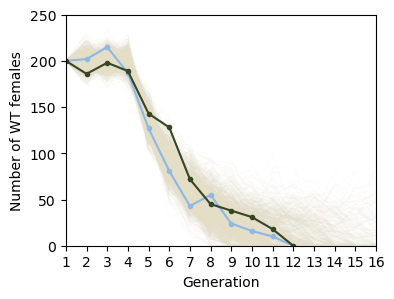

In [296]:
#No. WT females
f1 = PyPlot.figure(figsize=(4,3),frameon=false)
Random.seed!(123)
dist = []
#drive construct
n=0
for i in 1:1000
    run = run_sim(Egg_array,fitness_f_vals,ic_f_vals.+ic_m_vals,n_released_males = 100,n_releases = 20, first_release = 4, gen = 19+3+4,s=4)[3]
    if run[end] == 0
        PyPlot.plot(1:length(run),run,c="#E5DEC6","-",linewidth = 0.5,alpha=0.1)
        n = n+1
    else
        PyPlot.plot(1:length(run),run,c="#E5DEC6","-",linewidth = 0.5,alpha=0.1)
        push!(dist,run[12])
    end
    
end

PyPlot.plot(1:12,Release1,c="#8EB9E5",".-") #1 Cont
PyPlot.plot(1:12,Release2,c="#364524",".-") #2 Cont


PyPlot.xlim([1,gen+1])
PyPlot.ylim([0,250])
PyPlot.xlabel("Generation",size=10)
PyPlot.ylabel("Number of WT females",size=10)
PyPlot.xticks(collect(1:16))
#PyPlot.legend()

PyPlot.show()

println(n/1000)

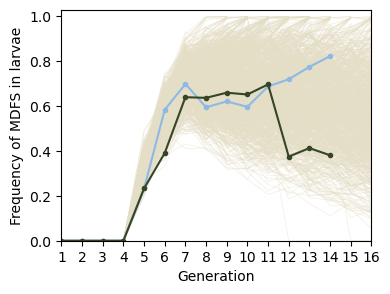

In [297]:
#Larvae frequency
f1 = PyPlot.figure(figsize=(4,3),frameon=false)
Random.seed!(123)
#drive construct
n=0
for i in 1:1000
    run = run_sim(Egg_array,fitness_f_vals,ic_f_vals.+ic_m_vals,n_releases = 3, first_release = 4, gen = 20,s=4)
    if run[3][end] == 0
        PyPlot.plot(1:length(run[2]),run[2],c="#E5DEC6","-",linewidth = 0.5,alpha=0.5)
        n = n+1
    else
        PyPlot.plot(1:length(run[2]),run[2],c="#E5DEC6","-",linewidth = 0.5,alpha=0.5)
    end
end

PyPlot.plot(1:14,Stop1_CFP,c="#8EB9E5",".-") #1 stop
PyPlot.plot(1:14,Stop2_CFP,c="#364524",".-") #2 stop
PyPlot.xticks(collect(1:16))

PyPlot.xlim([1,gen+1])
PyPlot.ylim([0,1.03])
PyPlot.xlabel("Generation",size=10)
PyPlot.ylabel("Frequency of MDFS in larvae",size=10)
PyPlot.xticks(collect(1:16))

PyPlot.show()

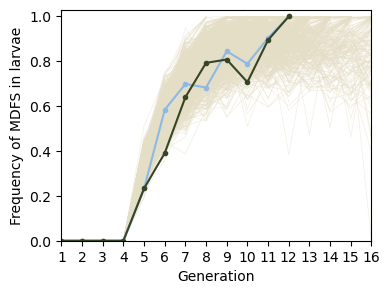

In [299]:
#Larvae frequency
f1 = PyPlot.figure(figsize=(4,3),frameon=false)
Random.seed!(123)
#drive construct
n=0
for i in 1:1000
    run = run_sim(Egg_array,fitness_f_vals,ic_f_vals.+ic_m_vals,n_releases = 20, first_release = 4, gen = 20,s=4)
    if run[3][end] == 0
        PyPlot.plot(1:length(run[2]),run[2],c="#E5DEC6","-",linewidth = 0.5,alpha=0.5)
        n = n+1
    else
        PyPlot.plot(1:length(run[2]),run[2],c="#E5DEC6","-",linewidth = 0.5,alpha=0.5)
    end
end

PyPlot.plot(1:12,Release1_CFP,c="#8EB9E5",".-") #1 cont
PyPlot.plot(1:12,Release2_CFP,c="#364524",".-") #2 cont

PyPlot.xlim([1,gen+1])
PyPlot.ylim([0,1.03])
PyPlot.xlabel("Generation",size=10)
PyPlot.ylabel("Frequency of MDFS in larvae",size=10)
PyPlot.xticks(collect(1:16))

PyPlot.show()